<a href="https://colab.research.google.com/github/Tej1109/MLP_Pracs/blob/main/Tejas_MLP_Prac_4_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns

data = load_wine()
X = data.data
Y = data.target
X.shape,Y.shape

((178, 13), (178,))

In [51]:
X = pd.DataFrame(X,columns= data.feature_names)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [52]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [53]:
for i in X.columns:
  if X[i].dtype != int and X[i].dtype !=np.float64:
    print(i,X[i].dtype)
#No categorical columns

In [54]:
df = pd.DataFrame(X,columns = X.columns)
df["target"] = Y
len(X.columns)

13

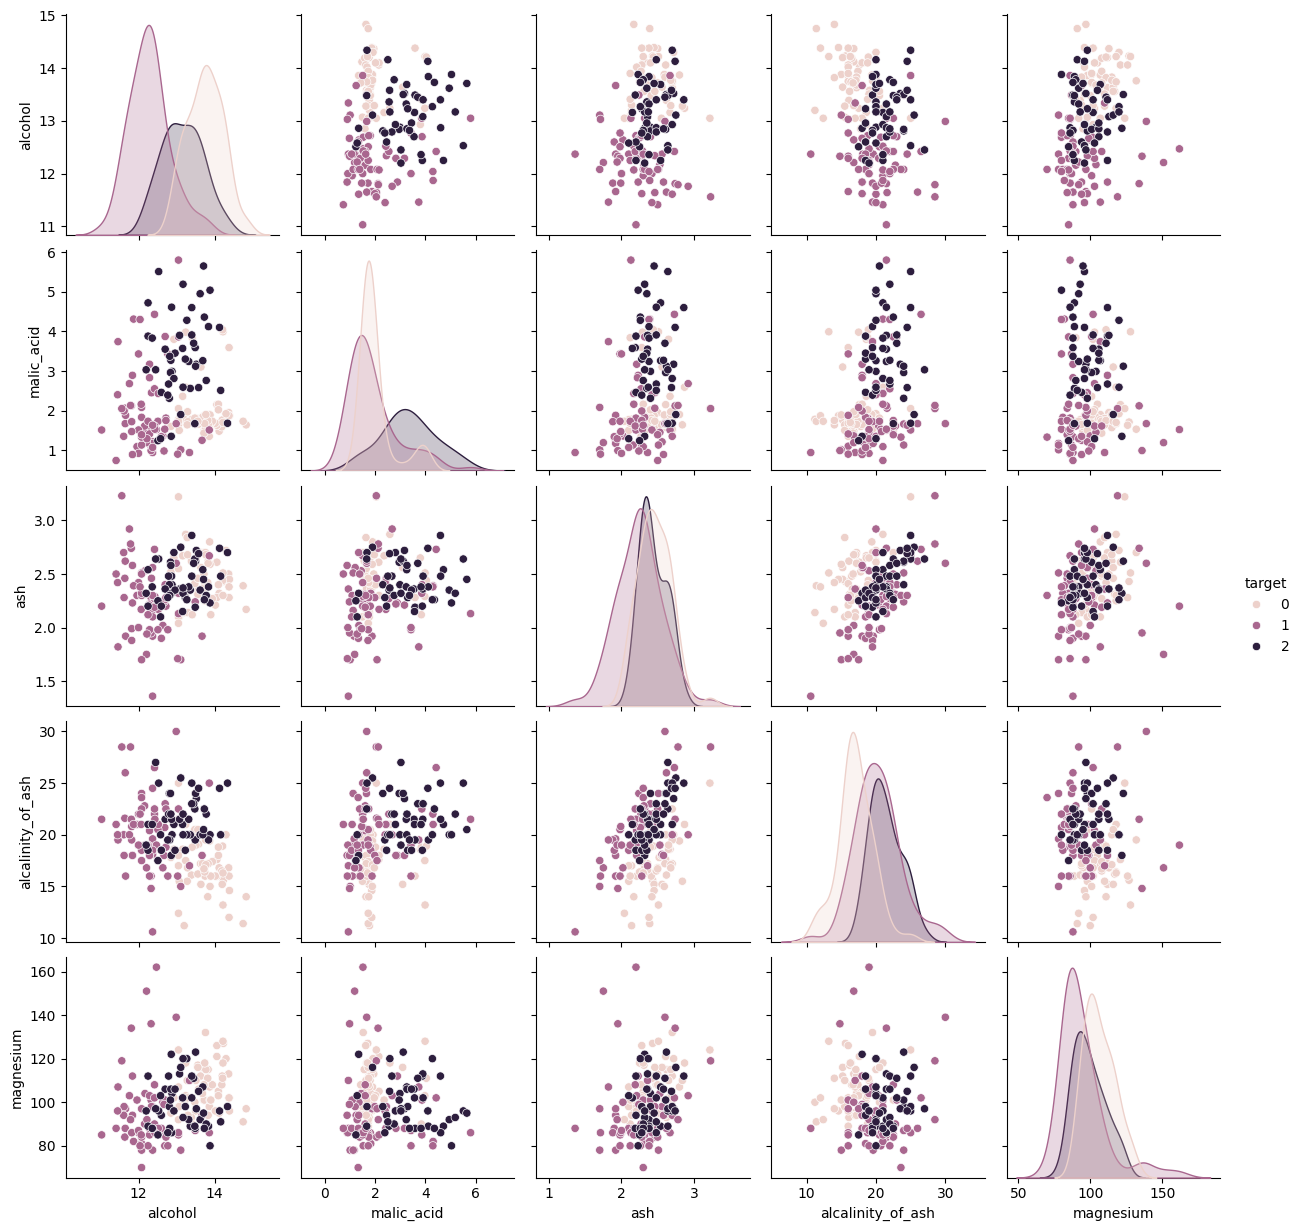

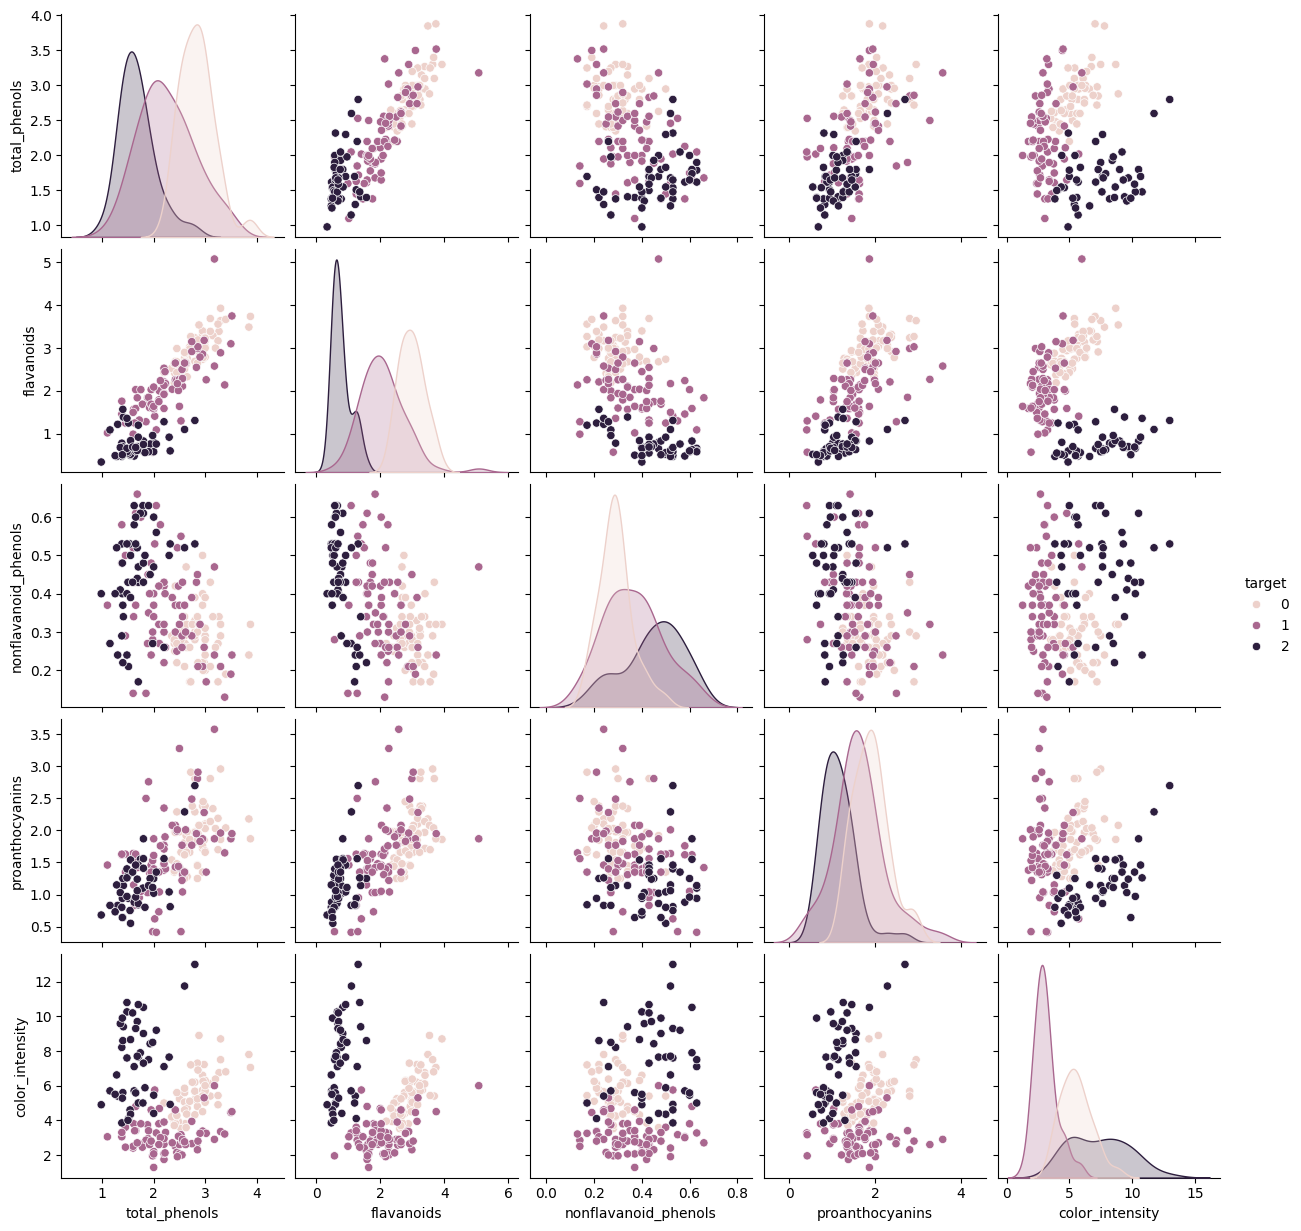

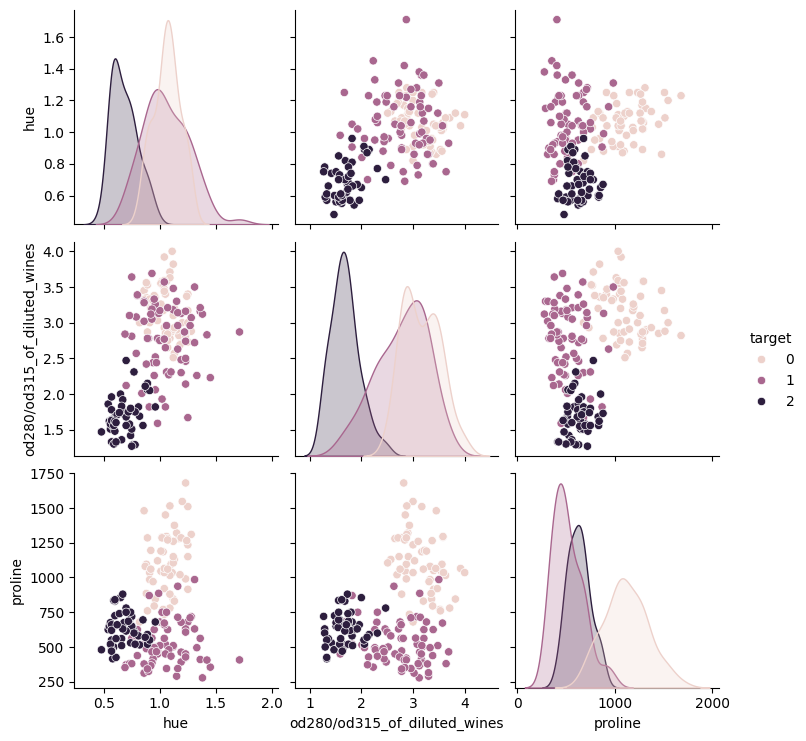

In [55]:
features_list = list(X.columns)
start_idx = 0
for i in range(3):
  idx = (i+1)*5
  sns.pairplot(df[features_list[start_idx:idx]+["target"]], hue = "target",diag_kind = "kde",height = 2.5)
  start_idx = idx

In [56]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =  0.2)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((142, 13), (36, 13), (142,), (36,))

Here we can see how each feature behaves with the other wrt class

In [57]:
#Scaling the data as knn is a distance based algo

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)


In [58]:
#Fitting knn
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train_sc,Y_train)
#Train Accuracy
model.score(X_train_sc,Y_train)

0.9577464788732394

In [59]:
#Test Accuracy
X_test_sc = scaler.transform(X_test)
model.score(X_test_sc,Y_test)

0.9722222222222222

In [61]:
#Saving model predictions
Y_pred = model.predict(X_test_sc)

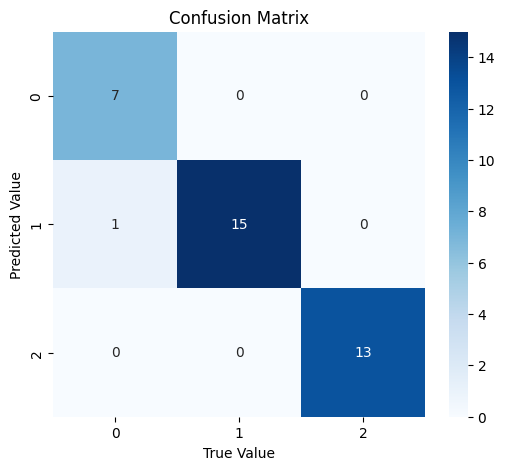

In [63]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test,Y_pred)
cm

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.title("Confusion Matrix")
plt.show()